Projet 2 : Estimateur par projection

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

Exercice 1)

1)

a)

In [2]:
n = 100
X = np.random.uniform(0, 1, n)

Voici l'histogramme du vecteur X généré : 

(array([11., 14.,  8.,  5., 13.,  8.,  8.,  8., 13., 12.]),
 array([0.00913291, 0.1078554 , 0.20657789, 0.30530039, 0.40402288,
        0.50274537, 0.60146787, 0.70019036, 0.79891285, 0.89763535,
        0.99635784]),
 <a list of 10 Patch objects>)

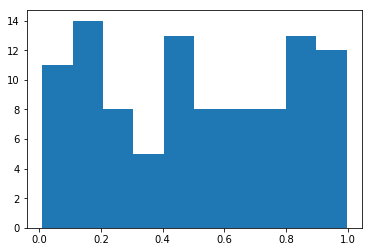

In [3]:
plt.hist(X)

b)

In [4]:
def f(x):
    return (np.power(x, 2) * np.power(2, x-1) - np.power(x - 0.5, 3)) * np.sin(10*x)

eps = np.random.normal(0, 1, n)
sigma = 0.2

Y = [f(x) + sigma * eps[i_x] for i_x, x in enumerate(X)]

Voici l'histogramme du vecteur Y généré :

(array([ 1.,  0.,  6.,  8., 17., 23., 13., 14.,  9.,  9.]),
 array([-0.78533579, -0.64144021, -0.49754462, -0.35364903, -0.20975345,
        -0.06585786,  0.07803773,  0.22193331,  0.3658289 ,  0.50972449,
         0.65362007]),
 <a list of 10 Patch objects>)

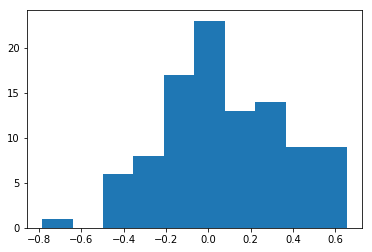

In [5]:
plt.hist(Y)

2)

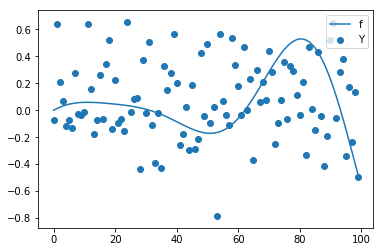

In [6]:
f_graph = [f(i_x) for i_x in np.linspace(0, 1, n)]

plt.figure()
plt.scatter(range(0, n), Y)
plt.plot(f_graph)
plt.legend([
    "f",
    "Y"
], loc="upper right")
plt.show()

# fonction + nuage de point --> OK, vérifiée

3)

a)

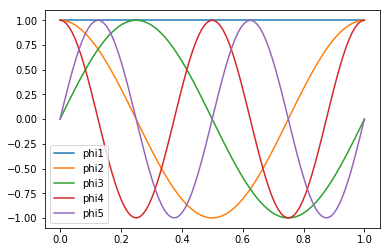

In [7]:
def base_fourier(n, x):
    if n == 1:
        return 1
    elif n%2 == 0:
        k = n/2
        return np.cos(2 * np.pi * k * x)
    else:
        k = (n-1)/2
        return np.sin(2 * np.pi * k * x)

plt.figure()
legend_list = []
for i in range(1, 6):
    phi = []
    for x in np.linspace(0, 1, 100):
        phi.append(base_fourier(i, x))
    plt.plot(np.linspace(0, 1, 100), phi)
    legend_list.append("phi" + str(i))
plt.legend(legend_list, loc="lower left")
plt.show()

#base fourier --> OK, verifiée

b)

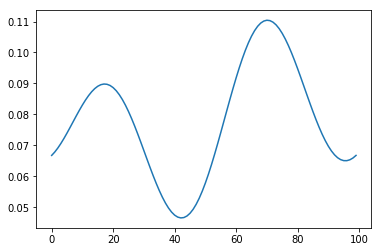

In [8]:
def f_chap_list(Y, N):
    n = len(Y)
    F_chap = list()
    for x in np.linspace(0, 1, n):
        f_chap = 0
        for j in range(1, N + 1):
            theta_j = 0
            for i in range(1, n+1):
                theta_j = theta_j + Y[i-1] * base_fourier(j, i/n)
            theta_j = theta_j / n
            f_chap = f_chap + theta_j * base_fourier(j, x)
        F_chap.append(f_chap)
    return F_chap
 
F_chap = f_chap_list(Y, 5)
plt.plot(F_chap)

def f_chap(x, Y, N):
    n = len(Y)
    f_chap = 0
    for j in range(1, N + 1):
        theta_j = 0
        for i in range(1, n+1):
            theta_j = theta_j + Y[i-1] * base_fourier(j, i/n)
        theta_j = theta_j / n
        f_chap = f_chap + theta_j * base_fourier(j, x)
    return f_chap

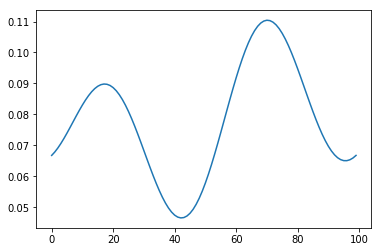

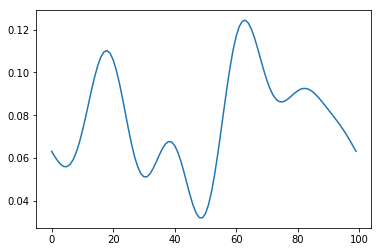

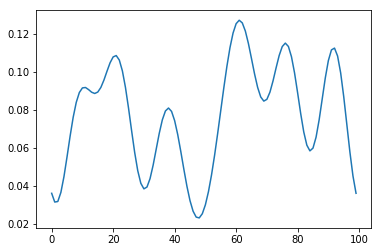

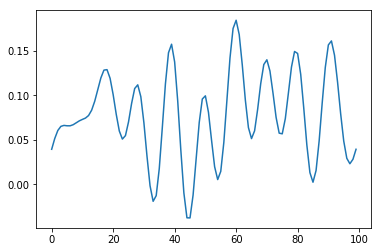

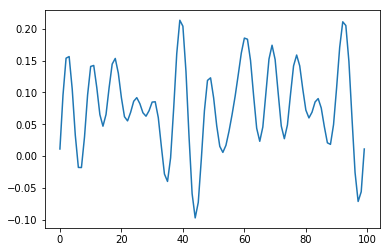

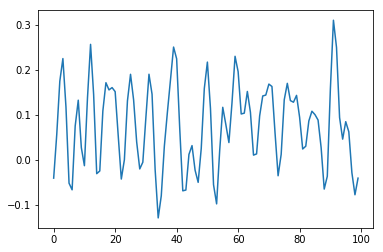

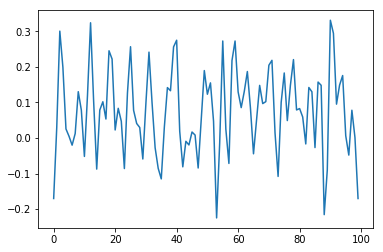

In [9]:
def fx_chap(x, N, theta):
    f = 0
    for j in range (0, N):
        f = f + theta[j] * base_fourier(j+1, x)
    return f

# Calcul des theta optimaux
theta_chap_list = list()
N_list = [5, 10, 15, 20, 30, 50, 70]
for N in N_list:
    theta_chap = list()
    for j in range(0, N):
        one_theta_chap = 0
        for i in range(0, n):
            one_theta_chap = one_theta_chap + Y[i] * base_fourier(j + 1, (i+1)/n)
        one_theta_chap = one_theta_chap / n
        theta_chap.append(one_theta_chap)
    theta_chap_list.append(theta_chap)

# Calcul des estimateurs par projection, pour chaque N, puis affichage de la fonction de régression estimée
for i_N, N in enumerate(N_list):
    f_list = list()
    for i_x in np.linspace(0, 1, 100):
        f_list.append(fx_chap(i_x, N, theta_chap_list[i_N]))
    plt.figure()
    plt.plot(f_list)

c)

In [10]:
v = 5
base = [(X[i], Y[i]) for i in range(0, n)]
blocks = {"B" + str(i_v): list() for i_v in range(1, v + 1) }
for i_obs in range(0, n):
    rand_v = int(np.random.uniform(1, 6))
    blocks["B" + str(rand_v)].append((X[i_obs], Y[i_obs]))

# base et blocks --> OK, vérifiée

In [11]:
CV_list = list()
for j in N_list:
    l_list = list()
    for v in range(1, 6):
        # étape 1 : calcul de l'estimateur sur Dn privé de Bv
        g_moins_v = f_chap
        base_moins_v = [x for x in base if x not in blocks["B" + str(v)]]
        X_moins_v = [x[0] for x in base_moins_v]
        Y_moins_v = [x[1] for x in base_moins_v]
        # étape 2 : calcul de l'erreur sur Bv
        l = 0
        for x in base_moins_v:
            l = l + np.power(g_moins_v(x[0], Y_moins_v, j) - x[1], 2)
        l = l/len(base_moins_v)
        l_list.append(l)
    # étape 3 : calcul de l'erreur de validation croisée
    CV = np.sum(l_list)
    CV_list.append(CV)
# étape 4 : on trouve l'algo optimal
j_etoile = np.argmin(CV_list)
N_etoile = N_list[j_etoile]
# étape 5 : construction de l'estimateur final
f_chap_etoile = f_chap_list(Y, N_etoile)

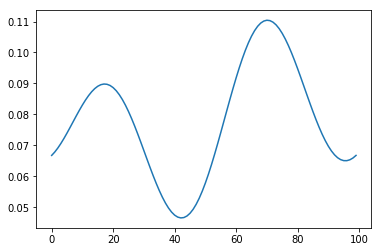

In [12]:
# on trace maintenant l'estimateur correspondant
plt.plot(f_chap_etoile)

4)

In [250]:
N_opt = list()

for i_try in range(1, 201):
    # Simulations de X et Y
    n = 100
    X = np.random.uniform(0, 1, n)
    eps = np.random.normal(0, 1, n)
    sigma = 0.2
    Y = [f(x) + sigma * eps[i_x] for i_x, x in enumerate(X)]

    # calcul du N optimal par validation croisée
    v = 5
    base = [(X[i], Y[i]) for i in range(0, n)]
    blocks = {"B" + str(i_v): list() for i_v in range(1, v + 1) }
    for i_obs in range(0, n):
        rand_v = int(np.random.uniform(1, 6))
        blocks["B" + str(rand_v)].append((X[i_obs], Y[i_obs]))
    
    CV_list = list()
    for j in N_list:
        l_list = list()
        for v in range(1, 6):
            # étape 1 : calcul de l'estimateur sur Dn privé de Bv
            g_moins_v = f_chap
            base_moins_v = [x for x in base if x not in blocks["B" + str(v)]]
            X_moins_v = [x[0] for x in base_moins_v]
            Y_moins_v = [x[1] for x in base_moins_v]
            # étape 2 : calcul de l'erreur sur Bv
            l = 0
            for x in base_moins_v:
                l = l + np.power(g_moins_v(x[0], Y_moins_v, j) - x[1], 2)
            l = l/len(base_moins_v)
            l_list.append(l)
        # étape 3 : calcul de l'erreur de validation croisée
        CV = np.sum(l_list)
        CV_list.append(CV)
    # étape 4 : on trouve l'algo optimal
    j_etoile = np.argmin(CV_list)
    N_etoile = N_list[j_etoile]
    print(N_etoile)
    # étape 5 : construction de l'estimateur final
    f_chap_etoile = f_chap_list(Y, N_etoile)
    
    # N Optimale pour 1 simulation
    N_opt.append(N_etoile)

(array([131.,   0.,   0.,  41.,   0.,   0.,  23.,   0.,   0.,   5.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ]),
 <a list of 10 Patch objects>)

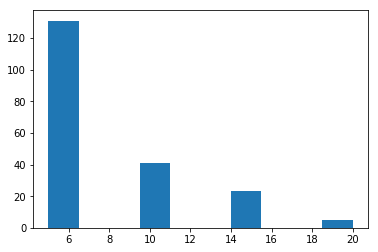

In [254]:
# on affiche l'historique des N optimaux sur nos 200 simulations 
plt.hist(N_opt)

Exercice 2)

In [70]:
data = pd.read_excel("Projet2-RealData.xlsx")
data.head(30)

,gas_consumption,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198,4341,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220,4354,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215,4312,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225,4425,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190,3850,8.5,70,1,"""amc ambassador dpl"""


In [73]:
# On supprime la colonne "car name"
clean_data = data[data.columns[:-1]]
# Il y a quelques valeurs manquantes dans le dataset : on supprime toutes les entrées qui 
# ne contiennent pas exclusivement des nombres
data_is_real = clean_data.applymap(np.isreal)
clean_data = clean_data[data_is_real]
clean_data = clean_data.dropna()
clean_data = clean_data.reset_index(drop=True)
# Re-Scaling des données pour qu'elles soient entre 0 et 1
# On utilise un Scaling Min-Max
clean_data = clean_data.apply(lambda x: (x - min(x))/(max(x) - min(x)) )

clean_data.head(30)

,gas_consumption,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.000000,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.000000,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.000000,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.000000,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.000000,0.0
5,0.159574,1.0,0.932817,0.826087,0.773462,0.119048,0.000000,0.0
6,0.132979,1.0,0.997416,0.945652,0.777148,0.059524,0.000000,0.0
7,0.132979,1.0,0.961240,0.918478,0.765240,0.029762,0.000000,0.0
8,0.132979,1.0,1.000000,0.972826,0.797278,0.119048,0.000000,0.0
9,0.159574,1.0,0.832041,0.782609,0.634250,0.029762,0.000000,0.0


In [82]:
# Maintenant que nos données sont préparées,
# on peut estimer la fonction de régression des X sur Y
Y = clean_data["gas_consumption"]
X = clean_data[clean_data.columns[clean_data.columns != "gas_consumption"]]

# Ici, X est dans R^8
# Dans l'exercice 1, X était dans R^1
# Afin de suivre la méthode utilisée dans l'exercice 1, nous prenons une colonne parmi
# les X, afin d'avoir X dans R^1.
# On prend évidemment une variable que nous penson pouvoir expliquer en partie la consommation
# d'essence
# Nous décidons de prendre la puissance du moter : la colonne horsepower
X = clean_data["horsepower"]

In [83]:
Y.head(10)

0    0.239362
1    0.159574
2    0.239362
3    0.186170
4    0.212766
5    0.159574
6    0.132979
7    0.132979
8    0.132979
9    0.159574
Name: gas_consumption, dtype: float64

In [84]:
X.head()

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64

In [101]:
sorted_data = clean_data.sort_values(by="horsepower")
sorted_data.head(10)

,gas_consumption,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
19,0.452128,0.2,0.074935,0.000000,0.062943,0.744048,0.000000,0.5
101,0.452128,0.2,0.074935,0.000000,0.095549,0.773810,0.250000,0.5
324,0.914894,0.2,0.056848,0.010870,0.204707,0.934524,0.833333,0.5
323,0.938830,0.2,0.056848,0.010870,0.133825,0.815476,0.833333,0.5
242,0.906915,0.2,0.056848,0.010870,0.105472,0.803571,0.666667,0.5
116,0.531915,0.2,0.000000,0.016304,0.072016,0.684524,0.250000,0.5
193,0.531915,0.2,0.043928,0.032609,0.119648,0.845238,0.500000,0.0
244,0.632979,0.2,0.025840,0.032609,0.105472,0.678571,0.666667,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.000000,0.5
142,0.585106,0.2,0.020672,0.032609,0.010207,0.505952,0.333333,1.0


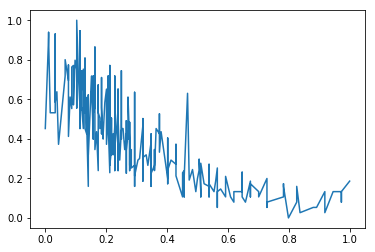

In [98]:
X_sorted = sorted_data["horsepower"]
Y_sorted = sorted_data["gas_consumption"]
plt.plot(X_sorted, Y_sorted)

In [85]:
# Estimation par projection, même méthode que dans l'exercice 1 :
# - Estimation du N optimal par validation croisée
# - Construction de l'estimateur final

# calcul du N optimal par validation croisée
v = 5
base = [(X[i], Y[i]) for i in range(0, n)]
blocks = {"B" + str(i_v): list() for i_v in range(1, v + 1) }
for i_obs in range(0, n):
    rand_v = int(np.random.uniform(1, 6))
    blocks["B" + str(rand_v)].append((X[i_obs], Y[i_obs]))
    
CV_list = list()
for j in N_list:
    l_list = list()
    for v in range(1, 6):
        # étape 1 : calcul de l'estimateur sur Dn privé de Bv
        g_moins_v = f_chap
        base_moins_v = [x for x in base if x not in blocks["B" + str(v)]]
        X_moins_v = [x[0] for x in base_moins_v]
        Y_moins_v = [x[1] for x in base_moins_v]
        # étape 2 : calcul de l'erreur sur Bv
        l = 0
        for x in base_moins_v:
            l = l + np.power(g_moins_v(x[0], Y_moins_v, j) - x[1], 2)
        l = l/len(base_moins_v)
        l_list.append(l)
    # étape 3 : calcul de l'erreur de validation croisée
    CV = np.sum(l_list)
    CV_list.append(CV)
# étape 4 : on trouve l'algo optimal
j_etoile = np.argmin(CV_list)
N_etoile = N_list[j_etoile]
print(N_etoile)
# étape 5 : construction de l'estimateur final
f_chap_etoile = f_chap_list(Y, N_etoile)

5


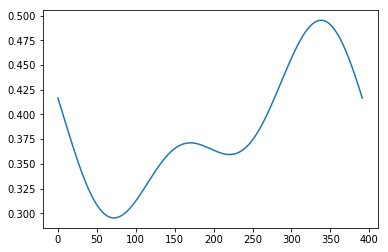

In [86]:
plt.plot(f_chap_etoile)

In [102]:
predicted_consumption = [(f_chap(x, Y, N_etoile), Y[i])for i, x in enumerate(X)]

In [103]:
predicted_consumption

[(0.3704283905813487, 0.23936170212765956),
 (0.377402735553522, 0.15957446808510636),
 (0.35940259912761496, 0.23936170212765956),
 (0.35940259912761496, 0.18617021276595744),
 (0.3638404750361921, 0.2127659574468085),
 (0.4884727993446498, 0.15957446808510636),
 (0.46441340629308503, 0.13297872340425532),
 (0.4813302286559168, 0.13297872340425532),
 (0.44226734207404017, 0.13297872340425532),
 (0.4669809742815381, 0.15957446808510636),
 (0.3916912776369933, 0.15957446808510636),
 (0.3671971517731839, 0.13297872340425532),
 (0.35940259912761496, 0.15957446808510636),
 (0.44226734207404017, 0.13297872340425532),
 (0.3170891633810952, 0.39893617021276595),
 (0.3170891633810952, 0.3457446808510638),
 (0.32212000656866896, 0.23936170212765956),
 (0.2982234663861304, 0.3191489361702127),
 (0.30237634645896705, 0.4787234042553191),
 (0.4165853315044467, 0.45212765957446804),
 (0.30081641249197794, 0.425531914893617),
 (0.3059655642896678, 0.39893617021276595),
 (0.3170891633810952, 0.425531